#Información de accidentes en Barcelona

A principios de este año, junto con otra persona con quien compartimos ideas y pensamos proyectos para desarrollar, comenzamos a planear un sistema mejorado que se encargue de controlar y modificar el funcionamiento de los semáforos de una ciudad. Esta idea se encuentra en sus primeros pasos y surge ante la necesidad de eliminar parcialmente momentos de espera innecesarios en semáforos rojos, como también mejorar la circulación en áreas y horarios de atascos y así prevenir choques en cadena, por ejemplo. Creemos que en determinadas circunstancias como estas el proyecto puede llegar a ser provechoso si termina concretándose.

Presentado el caso, parece buena oportunidad aprovechar este curso para analizar los accidentes viales en una ciudad, y aislar los casos más relevantes para el proyecto, aquellos que a través de una mejora en el sistema pueden erradicarse o disminuir el número de víctimas.

El dataset elegido y con el que trabajé la anterior entrega muestra las personas involucradas en un accidente gestionado por la Guardia Urbana en la ciudad de Barcelona que han sufrido algún tipo de lesión (herido leve, herido grave o muerte). Incluye la descripción de la persona (conductor, pasajero o peatón), sexo, edad, vehículo asociado a la persona y si la causa ha sido del peatón. Esta información sólo corresponde al año 2021, por lo que el análisis no se hará a lo largo de los años, sino por época de un mismo año.


##Preguntas o hipótesis de interés

Podemos analizar la información desde 3 diferentes puntos de vista. 

En primer lugar podemos hacer un análisis más descriptivo de qué clase de personas o qué clase de vehículo están involucrados en accidentes viales ¿Existirá alguna edad o genero más propenso a accidentarse? ¿Cuál es el motivo por el cuál tuvieron el accidente?

Por otro lado, debemos considerar aspectos más generales en cuanto a locación y época. ¿Qué barrios son los más necesitados de una renovación y mejora en la seguridad vial? ¿Varía la cantidad de accidentes a través de los meses? ¿Qué momento del día es más propenso a albergar más accidentes? ¿Y qué día de la semana?

Finalmente, contando con la información anterior, lograremos tener un mayor conocimiento de la situación en la que nos encontramos. De reunir toda la data posible, potencialmente podremos analizar qué casos pueden ser revertidos y prevenidos con la implementación del sistema de semaforización. Según causas, ubicación, fecha, horario y descripción de la persona (peatones y conductores), sabremos con seguridad y definición el porcentaje de accidentes que disminuirá con un buen uso del nuevo sistema. 


#Import de librerías y dataset


In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import dates as mdates
from scipy import stats


pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.max_columns', 30) 

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Data Science
print (' ')
%ls

/content/gdrive/MyDrive/Data Science
 
barcelona_traffic_accidents.csv  inventario_sendas_peatonales.csv
causas_accidentes.csv            netflix_movies.csv
Datasets_Vasquez.ipynb           ProyectoDS_ParteII_Vasquez.ipynb
info_accidentes.csv              ProyectoDS_ParteI_Vasquez.ipynb
inventario_semaforos.csv         Visualizacion_Vasquez.ipynb


In [4]:
df = pd.read_csv('info_accidentes.csv',sep = ',')
df[['Numero_Expedient','Codi_districte','Nom_districte','Codi_barri','Nom_barri','Codi_carrer','Nom_carrer','Num_postal','Descripcio_dia_setmana','NK_ Any','Mes_ any','Nom_mes','Dia_mes','Descripcio_torn','Hora_dia','Descripcio_causa_vianant','Desc_Tipus_vehicle_implicat','Descripció_sexe','Edat','Descripció_tipus_persona','Descripcio_Lloc_atropellament_vianat','Descripcio_Motiu_desplaÃ§ament_vianant','Descripcio_Motiu_desplaÃ§ament_conductor','Descripcio_victimitzacio','Coordenada_UTM_X_ED50','Coordenada_UTM_Y_ED50','Longitud_WGS84','Latitud_WGS84']]
df = df.rename(columns ={'Numero_Expedient':'case_id', 'Codi_districte':'district_id', 'Nom_districte':'district_name', 'Codi_barri':'neighborhood_id', 'Nom_barri':'neighborhood_name', 'Codi_carrer':'street_id', 'Nom_carrer':'street_name', 'Num_postal':'postal_code', 'Descripcio_dia_setmana':'weekday', 'NK_ Any':'year', 'Mes_ any':'month', 'Nom_mes':'month_name', 'Dia_mes':'day', 'Descripcio_torn':'time_of_day', 'Hora_dia':'hour', 'Descripcio_causa_vianant':'cause', 'Desc_Tipus_vehicle_implicat':'vehicle_involved', 'Descripció_sexe':'sex', 'Edat':'age', 'Descripció_tipus_persona':'person','Descripcio_Lloc_atropellament_vianat':'place_of_hit','Descripcio_Motiu_desplaÃ§ament_vianant':'reason_of_pedestrian', 'Descripcio_Motiu_desplaÃ§ament_conductor':'reason_of_driver','Descripcio_victimitzacio':'description_of_victim', 'Coordenada_UTM_X_ED50':'coordenate_x', 'Coordenada_UTM_Y_ED50':'coordenate_y', 'Longitud_WGS84':'longitude', 'Latitud_WGS84':'latitude'})
df.head()

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_id,street_name,postal_code,weekday,year,month,month_name,day,time_of_day,hour,cause,vehicle_involved,sex,age,person,place_of_hit,reason_of_pedestrian,reason_of_driver,description_of_victim,coordenate_x,coordenate_y,longitude,latitude
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Dimarts,2021,4,Abril,13,Tarda,20,No és causa del vianant,Bicicleta,Dona,8,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430455.95,4581207.96,2.167209,41.377541
1,2021S001254,1,Ciutat Vella,1,el Raval,198804,Paral·lel,0050B0050B,Divendres,2021,3,Març,12,Matí,12,No és causa del vianant,Taxi,Home,58,Vianant,A la vorera / Andana ...,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,430812.07,4580929.31,2.171499,41.375062
2,2021S005693,1,Ciutat Vella,1,el Raval,250904,Pelai,0056 0056,Dilluns,2021,10,Octubre,11,Tarda,19,No és causa del vianant,Veh. mobilitat personal amb motor,Dona,52,Vianant,A la vorera / Andana ...,Desconegut,Desconegut,Ferit lleu: Hospitalització fins a 24h,430626.85,4582082.01,2.169152,41.385428
3,2021S000623,1,Ciutat Vella,1,el Raval,282106,Riera Alta,0010 0010,Dissabte,2021,2,Febrer,6,Tarda,15,No és causa del vianant,Bicicleta,Home,47,Vianant,A la vorera / Andana ...,Desconegut,Desconegut,Ferit lleu: Rebutja assistència sanitària,430434.78,4581547.79,2.166916,41.380600
4,2021S005042,1,Ciutat Vella,1,el Raval,701367,Raval,0053 0053,Diumenge,2021,9,Setembre,12,Tarda,17,No és causa del vianant,Veh. mobilitat personal amb motor,Home,4,Vianant,A la vorera / Andana ...,Desconegut,Desconegut,Ferit lleu: Hospitalització fins a 24h,430746.05,4581254.77,2.170672,41.377988


#Preparación del dataset: renombramiento y tratamiento de nulos

In [5]:
# busco todos las cadenas de string presentes en el dataframe para traducir al ingles y trabajar mejor
print('cause')
print(df['cause'].value_counts())
print('-'*35)
print('description_of_victim')
print(df['description_of_victim'].value_counts())
print('-'*35)
print('vehicle_involved')
print(df['vehicle_involved'].value_counts())
print('-'*35)
print('place_of_hit')
print(df['place_of_hit'].value_counts())
print('-'*35)
print('person')
print(df['person'].value_counts())
print('-'*35)
print('reason_of_pedestrian')
print(df['reason_of_pedestrian'].value_counts())
print('-'*35)
print('reason_of_driver')
print(df['reason_of_driver'].value_counts())

cause
No és causa del  vianant           8253
Desobeir el senyal del semàfor      240
Creuar per fora pas de vianants     201
Altres                               97
Transitar a peu per la calçada       61
Desobeir altres senyals               2
Name: cause, dtype: int64
-----------------------------------
description_of_victim
Ferit lleu: Hospitalització fins a 24h                      5962
Ferit lleu: Amb assistència sanitària en lloc d'accident    2186
Ferit lleu: Rebutja assistència sanitària                    527
Ferit greu: hospitalització superior a 24h                   167
Mort (dins 24h posteriors accident)                           12
Name: description_of_victim, dtype: int64
-----------------------------------
vehicle_involved
Motocicleta                            4131
Turisme                                1734
Bicicleta                               723
Veh. mobilitat personal amb motor       707
Ciclomotor                              547
Autobús                       

In [6]:
# traduzco lo necesario
df['cause'] = df['cause'].str.replace(pat='No és causa del  vianant',repl='It is not the cause of the pedestrian',)
df['cause'] = df['cause'].str.replace(pat='Desobeir el senyal del semàfor',repl='Disobey the traffic light signal',)
df['cause'] = df['cause'].str.replace(pat='Creuar per fora pas de vianants',repl='Cross over the pedestrian crossing',)
df['cause'] = df['cause'].str.replace(pat='Altres',repl='Other',)
df['cause'] = df['cause'].str.replace(pat='Transitar a peu per la calçada',repl='Walk along the road',)
df['cause'] = df['cause'].str.replace(pat='Desobeir altres senyals',repl='Disobey other signals',)
df['description_of_victim'] = df['description_of_victim'].str.replace(pat='Ferit lleu: Hospitalització fins a 24h',repl='Minor injury: Hospitalization up to 24 hours',)
df['description_of_victim'] = df['description_of_victim'].str.replace(pat='Ferit lleu: Amb assistència sanitària en lloc d\'accident',repl='Minor injury: With health care in place of accident',)
df['description_of_victim'] = df['description_of_victim'].str.replace(pat='Ferit lleu: Rebutja assistència sanitària',repl='Minor injury: Refuse medical attention',)
df['description_of_victim'] = df['description_of_victim'].str.replace(pat='Ferit greu: hospitalització superior a 24h',repl='Serious injury: hospitalization for more than 24 hours',)
df['description_of_victim'] = df['description_of_victim'].str.replace(pat='Mort (dins 24h posteriors accident)',repl='Death (within 24 hours after the accident)',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Motocicleta',repl='Motorcycle',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Turisme',repl='Turism',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Bicicleta',repl='Bicycle',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Veh. mobilitat personal amb motor',repl='Personal mobility vehicle with engine',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Ciclomotor',repl='Moped',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Autobús',repl='Bus',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Furgoneta',repl='Van',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Autobús articulat',repl='Articulated Bus',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Altres vehicles amb motor',repl='Other motor vehicles',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Camió rígid <= 3,5 tones',repl='Rigid truck <= 3.5 tons',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Tot terreny',repl='All terrain',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Camió rígid > 3,5 tones',repl='Rigid truck > 3.5 tons',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Ambulància',repl='Ambulance',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Tractor camió',repl='Tractor truck',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Tren o tramvia',repl='Train',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Quadricicle < 75 cc',repl='Quadricycle < 75 cc',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Altres vehicles sense motor',repl='Other non-motorized vehicles',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Quadricicle > 75 cc  ',repl='Quadricycle > 75 cc',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Veh. mobilitat personal sense motor',repl='Personal mobility vehicle without engine',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Maquinària d\'obres i serveis',repl='Construction machinery and services',)
df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Autocaravana',repl='Motorhome',)
df['weekday'] = df['weekday'].str.replace(pat='Dilluns',repl='Monday',)
df['weekday'] = df['weekday'].str.replace(pat='Dimarts',repl='Tuesday',)
df['weekday'] = df['weekday'].str.replace(pat='Dimecres',repl='Wednesday',)
df['weekday'] = df['weekday'].str.replace(pat='Dijous',repl='Thursday',)
df['weekday'] = df['weekday'].str.replace(pat='Divendres',repl='Friday',)
df['weekday'] = df['weekday'].str.replace(pat='Dissabte',repl='Saturday',)
df['weekday'] = df['weekday'].str.replace(pat='Diumenge',repl='Sunday',)
df['month_name'] = df['month_name'].str.replace(pat='Gener',repl='January')
df['month_name'] = df['month_name'].str.replace(pat='Febrer',repl='February')
df['month_name'] = df['month_name'].str.replace(pat='Març',repl='March')
df['month_name'] = df['month_name'].str.replace(pat='Abril',repl='April')
df['month_name'] = df['month_name'].str.replace(pat='Maig',repl='May')
df['month_name'] = df['month_name'].str.replace(pat='Juny',repl='June')
df['month_name'] = df['month_name'].str.replace(pat='Juliol',repl='July')
df['month_name'] = df['month_name'].str.replace(pat='Agost',repl='August')
df['month_name'] = df['month_name'].str.replace(pat='Setembre',repl='September')
df['month_name'] = df['month_name'].str.replace(pat='Octubre',repl='October')
df['month_name'] = df['month_name'].str.replace(pat='Novembre',repl='November')
df['month_name'] = df['month_name'].str.replace(pat='Desembre',repl='December')
df['sex'] = df['sex'].str.replace(pat='Home',repl='M',)
df['sex'] = df['sex'].str.replace(pat='Dona',repl='F',)
df['place_of_hit'] = df['place_of_hit'].str.replace(pat='En pas regulat per semàfor',repl='In a crosswalk regulated by traffic lights',)
df['place_of_hit'] = df['place_of_hit'].str.replace(pat='A la vorera / Andana',repl='On the sidewalk',)
df['place_of_hit'] = df['place_of_hit'].str.replace(pat='Fora del pas',repl='Out of the crosswalk',)
df['place_of_hit'] = df['place_of_hit'].str.replace(pat='En pas sense regular',repl='In unregulated crosswalk',)
df['place_of_hit'] = df['place_of_hit'].str.replace(pat='Altres',repl='Other',)
df['place_of_hit'] = df['place_of_hit'].str.replace(pat='En zona peatonal',repl='In a pedestrian area',)
df['place_of_hit'] = df['place_of_hit'].str.replace(pat='En pas sense senyalitzar',repl='In unmarked crosswalk',)
df['person'] = df['person'].str.replace(pat='Conductor',repl='Driver',)
df['person'] = df['person'].str.replace(pat='Passatger',repl='Passenger',)
df['person'] = df['person'].str.replace(pat='Vianant',repl='Pedestrian',)

#Reemplazo 'Desconegut' (desonocido) por NaN e imprimo los nulos por columna
df = df.replace('Desconegut',np.nan)
print(df.isnull().sum())

<ipython-input-6-537fa49f100e>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description_of_victim'] = df['description_of_victim'].str.replace(pat='Mort (dins 24h posteriors accident)',repl='Death (within 24 hours after the accident)',)
<ipython-input-6-537fa49f100e>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Veh. mobilitat personal amb motor',repl='Personal mobility vehicle with engine',)
<ipython-input-6-537fa49f100e>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vehicle_involved'] = df['vehicle_involved'].str.replace(pat='Veh. mobilitat personal sense motor',repl='Personal mobility vehicle without engine',)


case_id                     0
district_id                 0
district_name              29
neighborhood_id             0
neighborhood_name          29
street_id                   0
street_name                29
postal_code                29
weekday                     0
year                        0
month                       0
month_name                  0
day                         0
time_of_day                 0
hour                        0
cause                       0
vehicle_involved            4
sex                         1
age                         7
person                      0
place_of_hit                0
reason_of_pedestrian     8356
reason_of_driver         2553
description_of_victim       0
coordenate_x                0
coordenate_y                0
longitude                  29
latitude                   29
dtype: int64


In [7]:
# las tres columnas con la razon de las personas contienen muchos nulos, no las utilizaremos
# de paso eliminamos las columnas que tampoco vayamos a utilizar
df = df[['case_id','district_id','district_name','neighborhood_id','neighborhood_name','street_id','street_name','postal_code','weekday','year','month','month_name', 'day','hour','cause','vehicle_involved','sex','age','person','description_of_victim','coordenate_x','coordenate_y','longitude','latitude']]

# imputo los nulos de la columna 'age'

df_age_nonull = df['age'].copy()
df_age_nonull.dropna(inplace=True)
df_age_nonull = df_age_nonull.astype(str).astype(float)
df['age'].fillna(df_age_nonull.mean(), inplace=True)
df['age'] = df['age'].astype(str).astype(float)

# nos quedan poco nulos, con los cuales podemos trabajar sin problema
print(df.isnull().sum())

case_id                   0
district_id               0
district_name            29
neighborhood_id           0
neighborhood_name        29
street_id                 0
street_name              29
postal_code              29
weekday                   0
year                      0
month                     0
month_name                0
day                       0
hour                      0
cause                     0
vehicle_involved          4
sex                       1
age                       0
person                    0
description_of_victim     0
coordenate_x              0
coordenate_y              0
longitude                29
latitude                 29
dtype: int64


<ipython-input-7-3ca9ae8fc6f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df_age_nonull.mean(), inplace=True)
<ipython-input-7-3ca9ae8fc6f0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(str).astype(float)


In [8]:
# añadimos una nueva columna de fecha concatenando año mes y día
cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df.date= pd.to_datetime(df.date) 

print(df.shape)
df.head()

(8854, 25)


,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_id,street_name,postal_code,weekday,year,month,month_name,day,hour,cause,vehicle_involved,sex,age,person,description_of_victim,coordenate_x,coordenate_y,longitude,latitude,date
0,2021S001906,1,Ciutat Vella,1,el Raval,68503,Carretes,0044 0044,Tuesday,2021,4,April,13,20,It is not the cause of the pedestrian,Bicycle,F,8.0,Pedestrian,Minor injury: Hospitalization up to 24 hours,430455.95,4581207.96,2.167209,41.377541,2021-04-13
1,2021S001254,1,Ciutat Vella,1,el Raval,198804,Paral·lel,0050B0050B,Friday,2021,3,March,12,12,It is not the cause of the pedestrian,Taxi,M,58.0,Pedestrian,Minor injury: Hospitalization up to 24 hours,430812.07,4580929.31,2.171499,41.375062,2021-03-12
2,2021S005693,1,Ciutat Vella,1,el Raval,250904,Pelai,0056 0056,Monday,2021,10,October,11,19,It is not the cause of the pedestrian,Personal mobility vehicle with engine,F,52.0,Pedestrian,Minor injury: Hospitalization up to 24 hours,430626.85,4582082.01,2.169152,41.385428,2021-10-11
3,2021S000623,1,Ciutat Vella,1,el Raval,282106,Riera Alta,0010 0010,Saturday,2021,2,February,6,15,It is not the cause of the pedestrian,Bicycle,M,47.0,Pedestrian,Minor injury: Refuse medical attention,430434.78,4581547.79,2.166916,41.380600,2021-02-06
4,2021S005042,1,Ciutat Vella,1,el Raval,701367,Raval,0053 0053,Sunday,2021,9,September,12,17,It is not the cause of the pedestrian,Personal mobility vehicle with engine,M,4.0,Pedestrian,Minor injury: Hospitalization up to 24 hours,430746.05,4581254.77,2.170672,41.377988,2021-09-12


#Gráficos

##Piechart

In [ ]:
s_vehicles = df['vehicle_involved'].value_counts()
s_vehicles

Motorcycle                                  4131
Turism                                      1734
Bicycle                                      723
Personal mobility vehicle with engine        707
Moped                                        547
Bus                                          353
Van                                          211
Bus articulat                                184
Taxi                                         122
Other motor vehicles                          32
Rigid truck <= 3.5 tons                       24
All terrain                                   21
Rigid truck > 3.5 tons                        20
Ambulance                                     11
Tractor truck                                 10
Train                                          7
Quadricycle < 75 cc                            4
Other non-motorized vehicles                   2
Quadricicle > 75 cc                            2
Personal mobility vehicle without engine       2
Construction machine

In [ ]:
# el porcentaje de los vehiculos involucrados en pocos accidentes es despreciable
# por lo que los sumo a todos juntos en la categoría "Otros"

s_vehicles_main = s_vehicles.loc[s_vehicles>100]
s_vehicles_other = s_vehicles.loc[s_vehicles<100]
s_vehicles_main = s_vehicles_main.append(pd.Series(data=[s_vehicles_other.sum()],index=['Other']))

In [ ]:
print('Total: ',s_vehicles_other.sum())
s_vehicles_other

Total:  138


Other motor vehicles                        32
Rigid truck <= 3.5 tons                     24
All terrain                                 21
Rigid truck > 3.5 tons                      20
Ambulance                                   11
Tractor truck                               10
Train                                        7
Quadricycle < 75 cc                          4
Other non-motorized vehicles                 2
Quadricicle > 75 cc                          2
Personal mobility vehicle without engine     2
Construction machinery and services          2
Motorhome                                    1
Name: vehicle_involved, dtype: int64

Text(0.5, 1.0, 'Piechart de vehículos envueltos en accidentes')

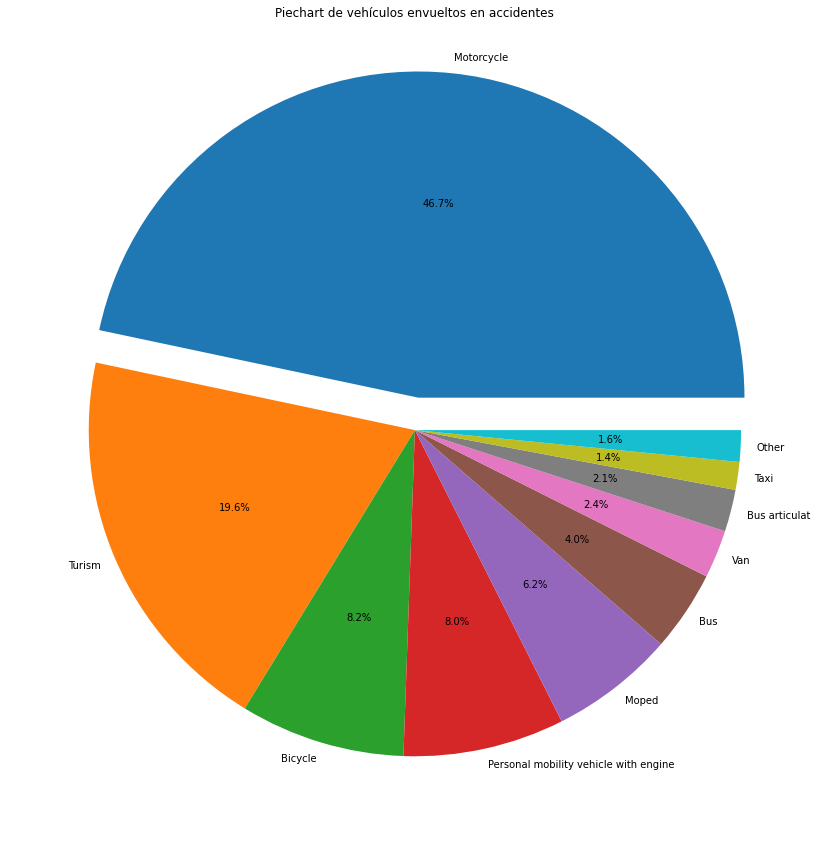

In [ ]:
fig,ax = plt.subplots(figsize =(25, 15))
myexplode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(s_vehicles_main, labels = s_vehicles_main.index, explode= myexplode,
       autopct = '%1.1f%%', pctdistance=.6, labeldistance=1.05)
ax.set_title('Piechart de vehículos envueltos en accidentes')

A través del piechart podemos ver la marcada tendencia de las motos a estar involucradas en accidentes. Casi la mitad de los accidentes del 2021 son provocados por este tipo de vehiculo. Las bicicletas y los vehículos personales también representan un gran porcentaje.

Por otro lado, la cantidad representada por el turismo será más díficil de evaluar y poder corregir si pensamos en un potencial sistema de semaforización, el cuál quizás sea mas entendido por los residentes de la ciudad, más familiarizados con este sistema.

##Histograma

<AxesSubplot:xlabel='age', ylabel='Density'>

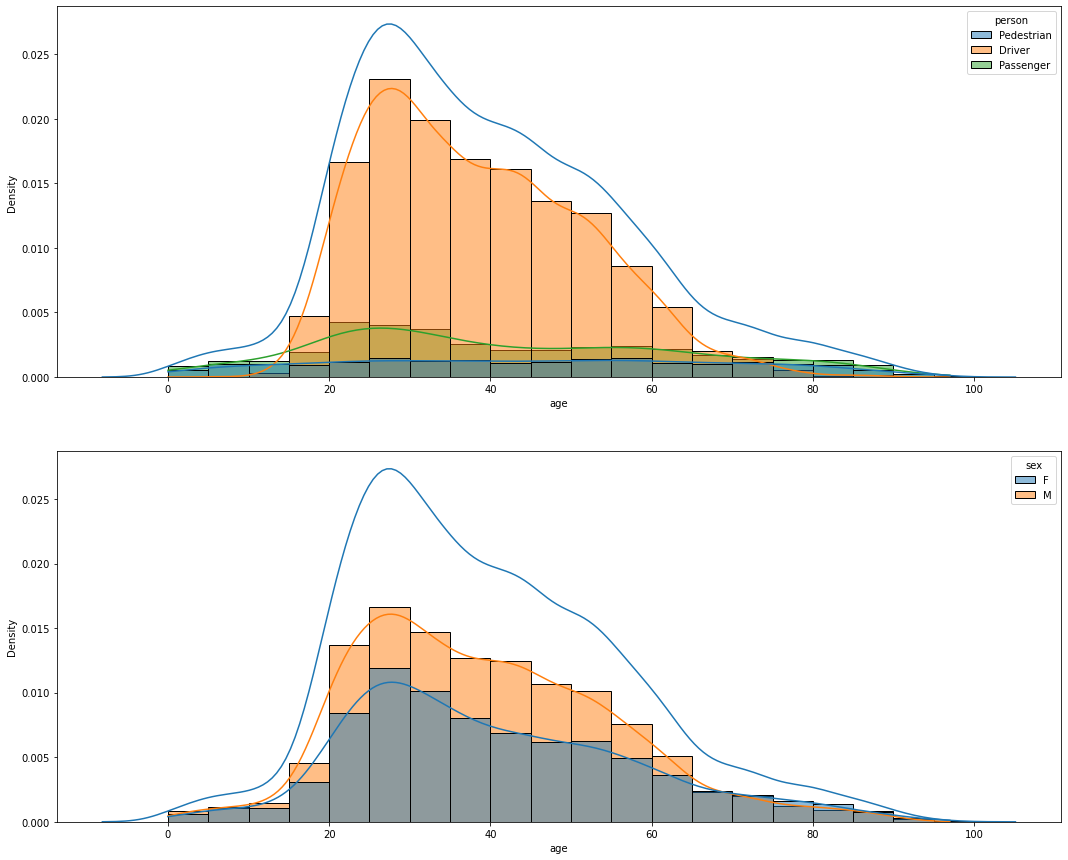

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))
sns.histplot(data=df, x="age", bins=40, binwidth=5, stat="density", kde=True, hue='person', ax=ax[0] )
sns.histplot(data=df, x="age", bins=40, binwidth=5, stat="density", kde=True, hue='sex', ax=ax[1])
sns.kdeplot(data=df, x="age", ax=ax[0], legend=True)
sns.kdeplot(data=df, x="age", ax=ax[1], legend=True)

Con este histograma podemos ver la distribución de las edades de las personas. En el primer gráfico, están discriminadas por peatón, conductor o pasajero; mientras que en el segundo por género.

Como era de esperar, los conductores abarcan edades entre los 20 y 60 años, estando mayormente involucrados las personas que se acercan a los 30 años. Por otra parte, los peatones victimas de accidentes viales tienden a estar más dispersos en todas las edades, desde adolescentes hasta ancianos. Es más, hay mas peatones y pasajeros de estas edades que conductores accidentados.

En el segundo gráfico sucede algo similar, ya que en las edades donde los adultos están más activos podemos visualizar un mayor número de accidentados masculinos que femeninos. Mientras que en edades más bajas o altas, hay más mujeres que hombres en accidentes viales.

Las edades donde todo se nivela van desde los 65 a 75, y en la adolescencia.

## Diagrama de cajas

In [ ]:
days_list=('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
month_list=('January','February','March','April','May','June','July','August','September','October','November','December')

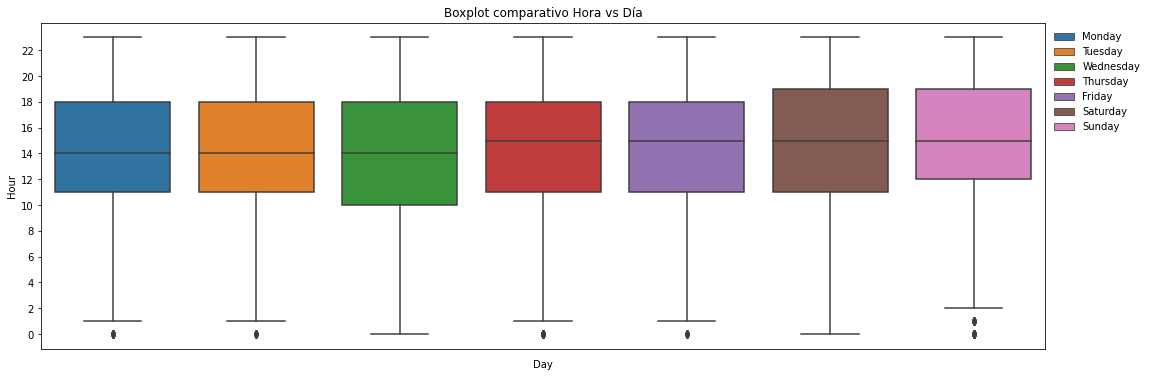

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(data = df, x="weekday", y="hour", order=days_list, hue='weekday',hue_order=days_list, dodge=False)
plt.title("Boxplot comparativo Hora vs Día")
sns.move_legend(ax,"upper left", title=None, frameon=False, bbox_to_anchor=(1, 1))
ax.set(xlabel='Day', ylabel='Hour', xticklabels=[])
ax.set_yticks(range(0,24,2))
ax.tick_params(bottom=False)

Con estos diagramas de cajas podemos tener respuestas más relacionadas a la estadística. Podemos analizar las horas de los accidentes en base a los días, y ver qué momento de qué día es más propenso a que haya accidentes.

En primer lugar, tenemos un diagrama de cajas que incluye los accdientes de todo el año. La mediana en todos los días ronda entre las 14 y las 15 horas, y podemos ver que los rangos intercuartílicos cercanos a la mediana rondan entre las 11 am y las 19 pm. También vemos que la madrugada de los domingos es el momento donde más casos atípicos hay.

Sin embargo, no hay una marcada diferencia entre cada día, sus números estadísticos son similares.

A continuación, la información está dividida por meses, para tener un análisis más específico por época.



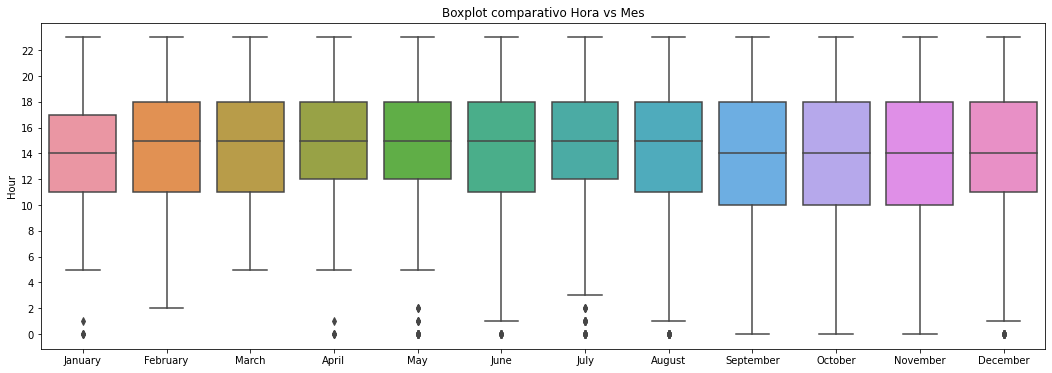

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(data = df, x="month_name", y="hour",order=month_list, dodge=False)
plt.title("Boxplot comparativo Hora vs Mes")
ax.set(xlabel=None, ylabel='Hour')
ax.set_yticks(range(0,24,2))

Con estos gráficos se puede realizar un análisis más profundo. Nos damos cuentas de varias cosas:

*   Los meses de invierno y primavera el rango entre el valor máximo y mínimo se acorta, no presentan tantos casos atípicos a horas de la madrugada
*   Durante el invierno, la mediana es menor a los otros meses, los accidentes ocurrern más temprano
*   En los meses de primavera los accidentes se concentran en menos horas, entre las 11 y las 18 aproximadamente
*   Durante el verano y la primera, es más común encontrar accidentes durante la madrugada

Finalmente, dejo a modo de complemento, unos diagramas de cajas que combina ambos gráficos anteriores, y muestra la relación entre la hora y el día por cada mes.





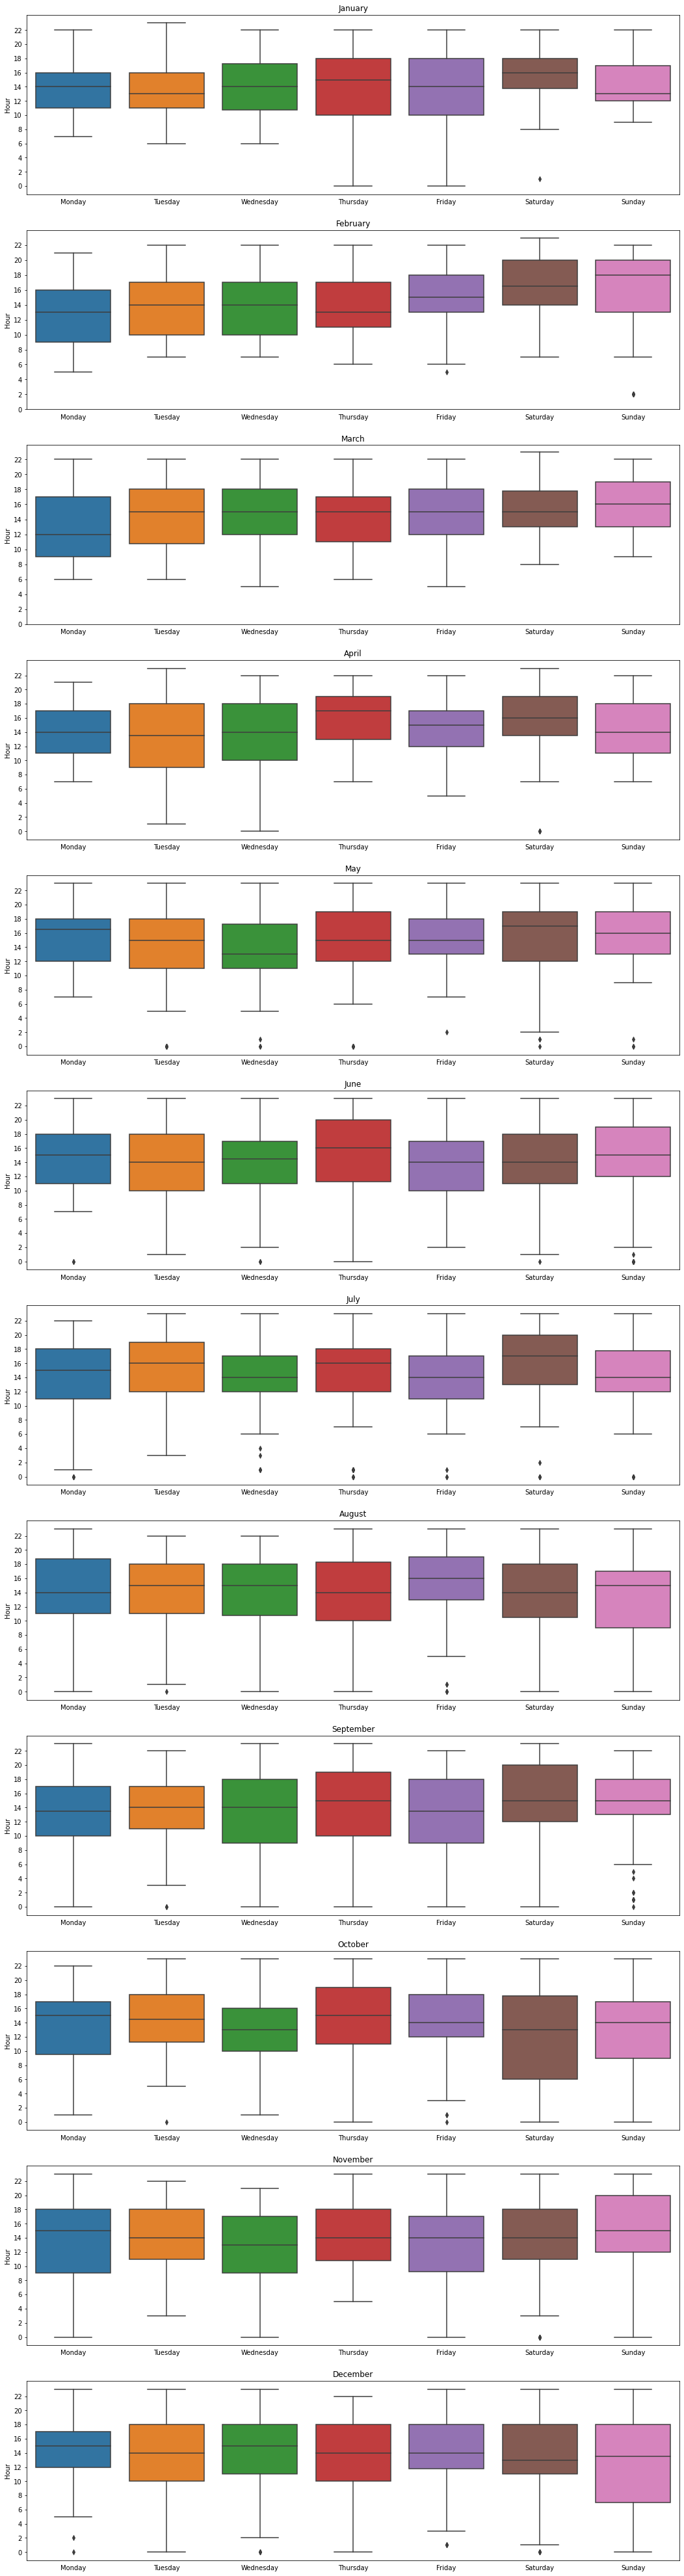

In [ ]:
fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(18, 72))
j=0
for i in (month_list):
  g = sns.boxplot(data = df.loc[df['month_name']==i], x="weekday", y="hour", order=days_list, ax=ax[j])
  g.set_title(i)
  g.set(xlabel=None, ylabel='Hour')
  g.set_yticks(range(0,24,2))
  g.tick_params(bottom=False)
  j=j+1

##Lineplot

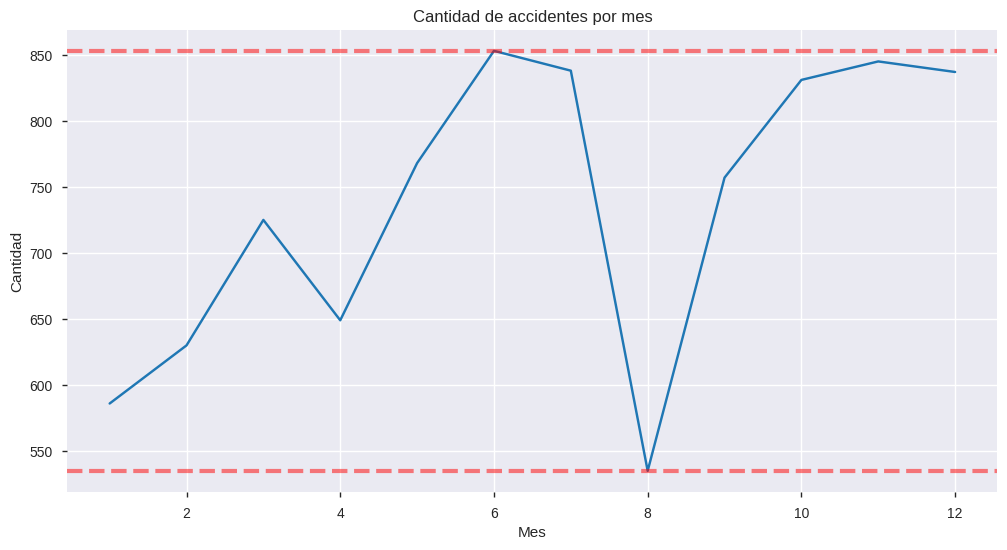

In [ ]:
s_month = df['month'].value_counts().sort_index(ascending=True)
fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(s_month.index, s_month)
ax.set_title('Cantidad de accidentes por mes') 
ax.set_xlabel('Mes')  
ax.set_ylabel('Cantidad') 
ax.axhline(s_month.min(), color='red', linestyle='--', alpha=0.5, linewidth=3)
ax.axhline(s_month.max(), color='red', linestyle='--', alpha=0.5, linewidth=3)

Con este lineplot podemos ver la variación de cantidad de accidentes a través de los meses. Durante el invierno (enero y febrero), pero sobre todo en verano durante Agosto, vemos que la cantidad de accidentes disminuye de manera drástica.

Por otra parte, durante el año escolar y de mayor actividad laboral y educativa vemos que los accidentes rondan entre los 600 y 800 accidentes al mes.

Con esto podemos asegurar que en el hipotético caso que pusieramos a prueba el sistema de semaforización, no tendrá la mismas exigencias en todos los meses. Deberemos encontrar en qué meses logra el objetivo de mejorar los problemasa de tránsito y en cuáles no.

## Gráfico de Barras

Acompañado de un sactterplot para mejor entendimiento

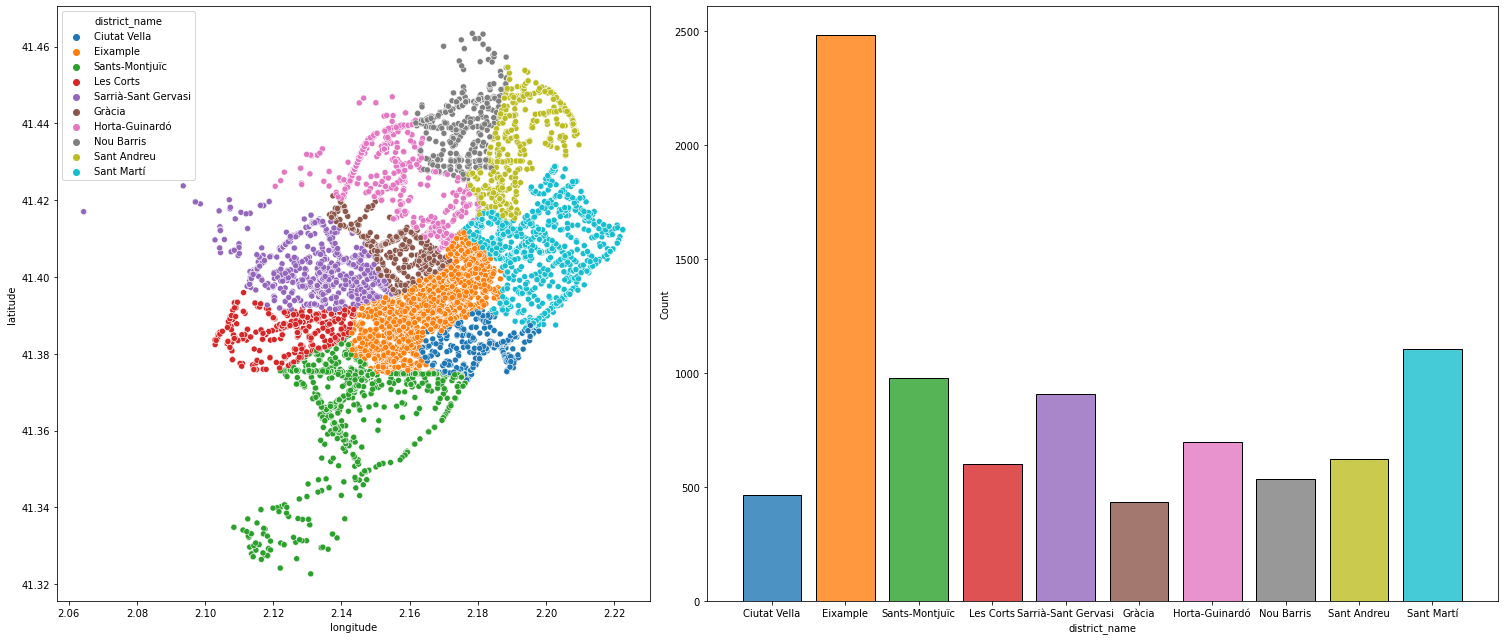

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(21, 9), gridspec_kw=dict(width_ratios=[3, 4]))

sns.scatterplot(data=df, x="longitude", y="latitude", hue="district_name", ax=ax[0])
sns.histplot(data=df, x="district_name", hue="district_name", shrink=.8, alpha=.8, legend=False, ax=ax[1])

fig.tight_layout()


Este gráfico muestra la cantidad de accidentes por distrito. Para hacer más fácil la visualización, se añadió un scatterplot que viene a representar un mapa de Barcelona.

Podemos concluir que las zonas más céntricas y turísticas tales como Eixample y Sant Martí son las que albergan más accidentes. También debemos comparar la cantidad de accidentes ocurridos con el tamaño de cada dsitrito, ya que distritos más alejados pero muy amplios albergan muchos accidentes por ser extensos.

Una vez implementado el sistema, podemos analizar de nuevo los distritos y ver cuáles lograron disminuir la cantidad de accidentes considerablemente

##Diagramas de dispersión

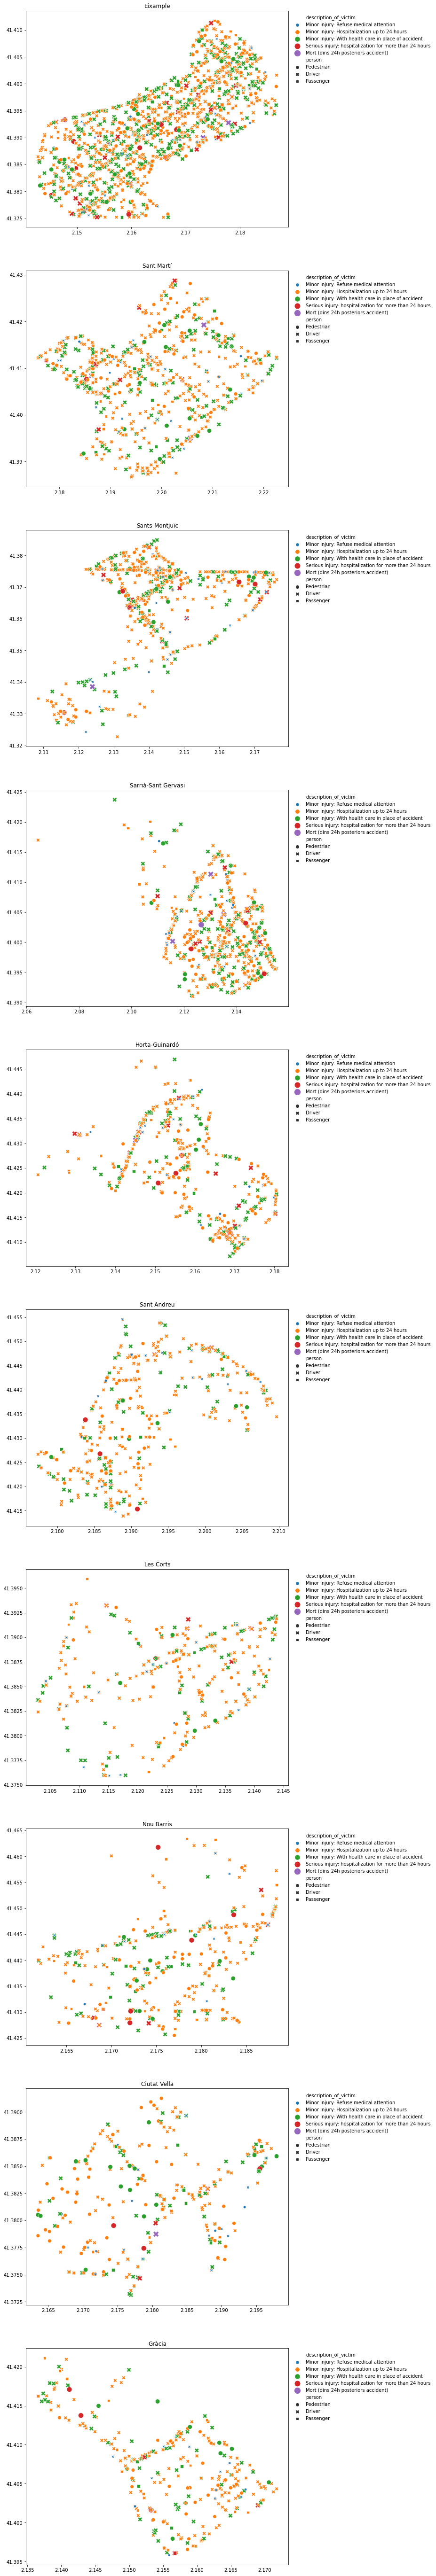

In [ ]:
order_data = ['Minor injury: Refuse medical attention',
             'Minor injury: Hospitalization up to 24 hours',
            'Minor injury: With health care in place of accident',
            'Serious injury: hospitalization for more than 24 hours',
            'Mort (dins 24h posteriors accident)']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10, 100))
j=0

for i in (df['district_name'].value_counts().index):
  g = sns.scatterplot(data = df.loc[df['district_name']==i], x="longitude", y="latitude",
                      hue="description_of_victim", hue_order= order_data, size="description_of_victim",size_order=order_data,  sizes=(150,30), style='person', ax=ax[j])
  g.set_title(i)
  sns.move_legend(g,"upper left", title=None, frameon=False, bbox_to_anchor=(1, 1))
  g.set(xlabel=None, ylabel=None)
  j=j+1

Finalmente, los scatterplots tratan sobre las ubicaciones de los accidentes según sus consecuencias en los accidentados. Además, la forma señala que rol ocupaba la persona en el accidente.

De esta manera, podemos analizar qué consecuencias prevenimos y en qué lugar, y cuále sson las tendencias según la zona.

vemos que en Eixample y la zona de los distritos límitrofes más cercanas a este mismo, se marca una tendencia en conductores accidentados. Es la zona más céntrica y donde toda la actividad de la ciudad transcurre.

A medida que nos alejamos del centro, empieza a variar los accidentados tanto en qué rol ocupan como su consecuencia. Quizás tenga que ver con la velocidad de los autos en la lejanía y por esto una mayor gravedad de los accidentes.

Con la implementación del sistema es más probable que se pueda mejorar la cantidad de accidentados y disminuir su gravedad en la zona de mayor actividad, donde los accidentes pueden ser evitados por semáforos, no así las lejanías donde los accidentes provienen mayormente de excesos de velocidad y otras causas.

#Análisis estadístico

##Pandas Profiling

In [ ]:
pip install pandas-profiling

In [11]:
import pandas as pd
import pandas_profiling

In [13]:
df_report = df.copy()
profile = df_report.profile_report(title='Pandas Profiling Report')

In [14]:
profile

Output hidden; open in https://colab.research.google.com to view.

##IQR

In [ ]:
dates = df['date'].value_counts().index
amount = df['date'].value_counts()
dfe = pd.DataFrame(data={'amount_per_day':amount},index=dates)
dfe

,amount_per_day
2021-07-14,60
2021-12-01,49
2021-07-29,47
2021-07-02,47
2021-10-29,45
...,...
2021-01-09,6
2021-04-02,6
2021-01-10,6
2021-08-08,4


In [ ]:
metricas = dfe.describe().reset_index()
metricas

,index,amount_per_day
0,count,365.000000
1,mean,24.257534
2,std,9.142611
3,min,3.000000
4,25%,18.000000
5,50%,24.000000
6,75%,31.000000
7,max,60.000000


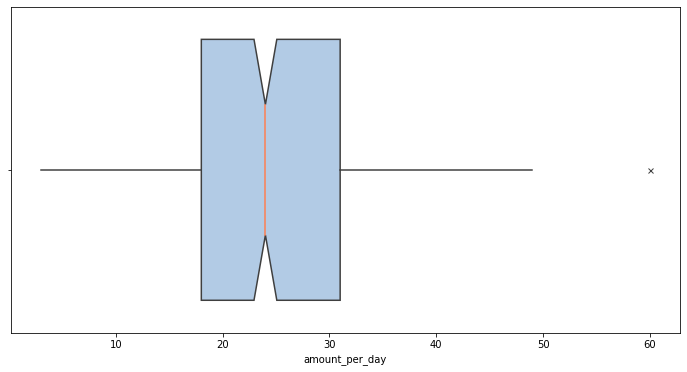

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=dfe["amount_per_day"],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)
plt.show()

In [ ]:
IQR = metricas.iloc[6][1] - metricas.iloc[4][1] 
LS = metricas.iloc[6][1] + 1.5*IQR
LI = metricas.iloc[4][1] - 1.5*IQR
print("IQR: {:.2f}".format(IQR))
print('')
print("Limite superior: {:.2f}".format(LS))
print("Limite inferior: {:.2f}".format(LI))

IQR: 13.00

Limite superior: 50.50
Limite inferior: -1.50


Podemos obtener varios datos de este análisis. Generalmente los accidentes diarios rondan entre los 20 y 30, siendo más especificos la mediana es 24, y el IQR es de 13.

##Intervalos de confianza

In [ ]:
from scipy.stats import t

m = dfe['amount_per_day'].mean()
s = dfe['amount_per_day'].std()

dof = len(dfe['amount_per_day'])-1

confianza = 0.95

t_calculado = np.abs(t.ppf((1-confianza)/2,dof)) 
print('Valor del estadistico: ',t_calculado)

print('Intervalo de confianza:', (m-s*t_calculado/np.sqrt(len(dfe['amount_per_day'])), m+s*t_calculado/np.sqrt(len(dfe['amount_per_day'])))) 

Valor del estadistico:  1.966502568799249
Intervalo de confianza: (23.316472026798568, 25.198596466352118)


Este dato nos puede ser util en un futuro, para analizar nuevamente si en futuros años disminuye considerablemente la cantidad de accidentes diarios, o seguimos dentro de los intervalos de confianza. Es un buen parámetro para cuantificar si tuvo éxito o no la implementación del sistema.

##Z Score

In [ ]:
dfe['Z'] = (dfe['amount_per_day'] - dfe['amount_per_day'].mean()) / dfe['amount_per_day'].std()
dfe['Status']= dfe['Z'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
dfe.head()

,amount_per_day,Z,Status
2021-07-14,60,3.909437,Atipico
2021-12-01,49,2.706280,Atipico
2021-07-29,47,2.487524,Atipico
2021-07-02,47,2.487524,Atipico
2021-10-29,45,2.268768,Atipico


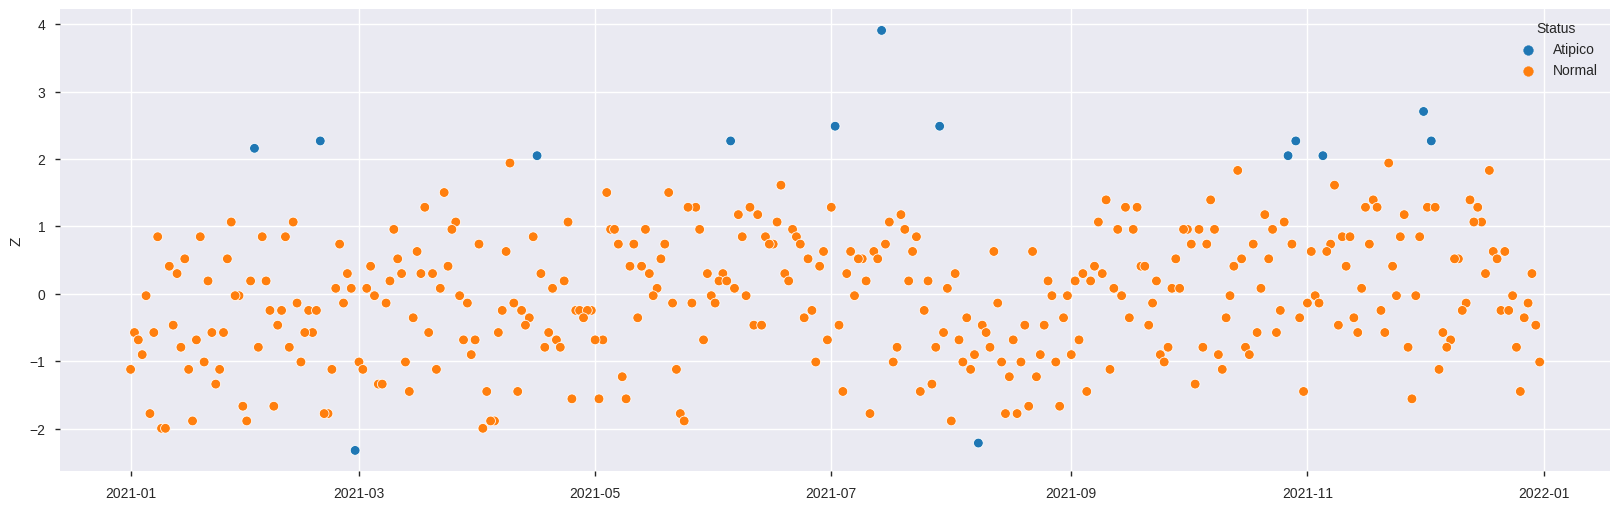

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x=dfe.index[:365], y= dfe[:365].Z, hue= dfe['Status'])
plt.show()

Con este último análisis encontramos algunos casos atípicos. Idealmente deberíamos poder generar que los casos atípicos bajos se conviertan en casos normales, dando a entender que la cantidad de accidentes diarios disminuyó.